# Data Cleaning

In [4]:
# Import Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
%matplotlib inline
import numpy.random as rnd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
import statistics
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
import statsmodels.formula.api as smf
from sklearn.ensemble import RandomForestRegressor

In [5]:
housing = pd.read_csv("data/housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
# convert categorical data to numerical data
le = LabelEncoder()
housing['ocean_proximity']=le.fit_transform(housing['ocean_proximity'])

In [9]:
# check for null values
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [10]:
mode = statistics.mode(housing['total_bedrooms'])
# Filling missing 'total_bedrooms' values with mode since mean doesn't make sense for total bedrooms:
housing['total_bedrooms']=housing['total_bedrooms'].fillna(housing['total_bedrooms'].mode()[0])

In [11]:
# check for null values again after replacing null values with the mode
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [12]:
housing.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity         int32
dtype: object

In [13]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,535.284351,1425.476744,499.539680,3.870671,206855.816909,1.165843
std,2.003532,2.135952,12.585558,2181.615252,420.053240,1132.462122,382.329753,1.899822,115395.615874,1.420662
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,292.000000,787.000000,280.000000,2.563400,119600.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,431.000000,1166.000000,409.000000,3.534800,179700.000000,1.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,1.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,4.000000


### We then created the following new attributes: number of rooms per household, bedrooms per rooms, population per household.

In [14]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [15]:
# Get column names first
names = housing.columns
# Create the Scaler object
scaler = StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(housing)
scaled_df = pd.DataFrame(scaled_df, columns=names)
scaled_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-1.327835,1.052548,0.982143,-0.804819,-0.967245,-0.974429,-0.977033,2.344766,2.129631,1.291089,0.628559,-1.088291,-0.049597
1,-1.322844,1.043185,-0.607019,2.045890,1.358707,0.861439,1.669961,2.332238,1.314156,1.291089,0.327041,-0.936892,-0.092512
2,-1.332827,1.038503,1.856182,-0.535746,-0.822021,-0.820777,-0.843637,1.782699,1.258693,1.291089,1.155620,-1.369108,-0.025843
3,-1.337818,1.038503,1.856182,-0.624215,-0.714889,-0.766028,-0.733781,0.932968,1.165100,1.291089,0.156966,-0.465514,-0.050329
4,-1.337818,1.038503,1.856182,-0.462404,-0.607758,-0.759847,-0.629157,-0.012881,1.172900,1.291089,0.344711,-0.668831,-0.085616


# Extrapolatory Data Analysis

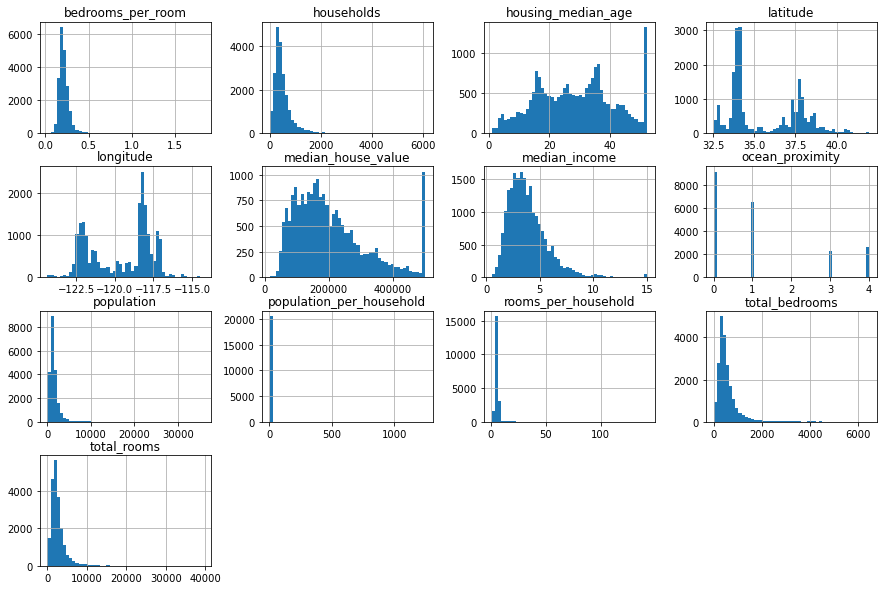

In [16]:
housing.hist(bins=50, figsize=(15,10))
plt.savefig("data/images/histograms.png")
plt.show()

## Stratified Sampling

### Most of the median income clusters around 1.5 to 6.0. 

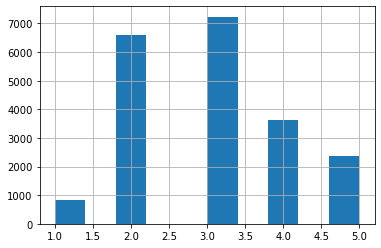

In [17]:
housing['income_cat'] = pd.cut(housing['median_income'], bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf], labels=[1, 2, 3, 4, 5])
housing['income_cat'].hist()
plt.show()

### Stratified Sampling is used to divide the population into various subsets and treat each subset as a separate population. We performed stratified sampling based on the income category above. 

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
print(strat_test_set['income_cat'].value_counts()/len(strat_test_set))

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64


### We remove the income category attribute to get the data back to its original form.

In [19]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)
housing = strat_train_set.copy()

### Visualize the dataset based on geographical locations 

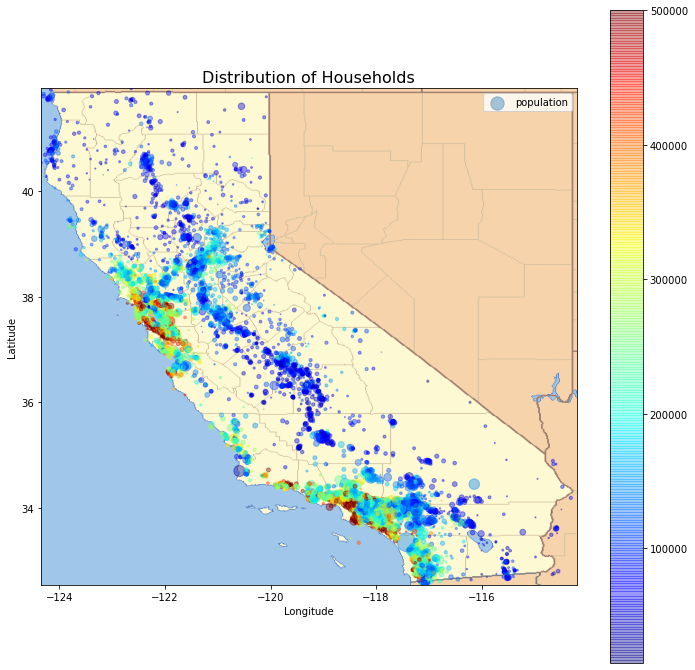

In [20]:
plt.figure(figsize=(12,12))
img=plt.imread("data/california.png")
plt.imshow(img, zorder=0, extent=[-124.35,-114.2,32.54,41.95])

plt.scatter(x=housing['longitude'], y=housing['latitude'], alpha=0.4, s=housing['population']/100, label='population',
         c=housing['median_house_value'], cmap=plt.get_cmap('jet'), zorder=1)
plt.colorbar()
plt.title("Distribution of Households", size=16)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.savefig("data/images/CA.png")

### The red marks represent the most expensive locations while the blue marks represents the more cheaper locations. The larger circles indicate areas with a larger population. It can be inferred that housing prices are related to the location and the population density. 

# Correlations

### Calculate the standard correlation coefficient between each pair of attributes

In [21]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
ocean_proximity             0.076990
households                  0.064506
total_bedrooms              0.047813
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.249253
Name: median_house_value, dtype: float64

### The closer the correlation coefficient is to 1 shows that there is a positive correlation. The closer the correlation coefficient is to -1 shows that there is a negative correlation. When it is close to 0, it means that there is no linear correlation. A +.40 to +.69 indicates a strong positive relationship. 

### This visualizes the attributes that are likely to be correlated. 

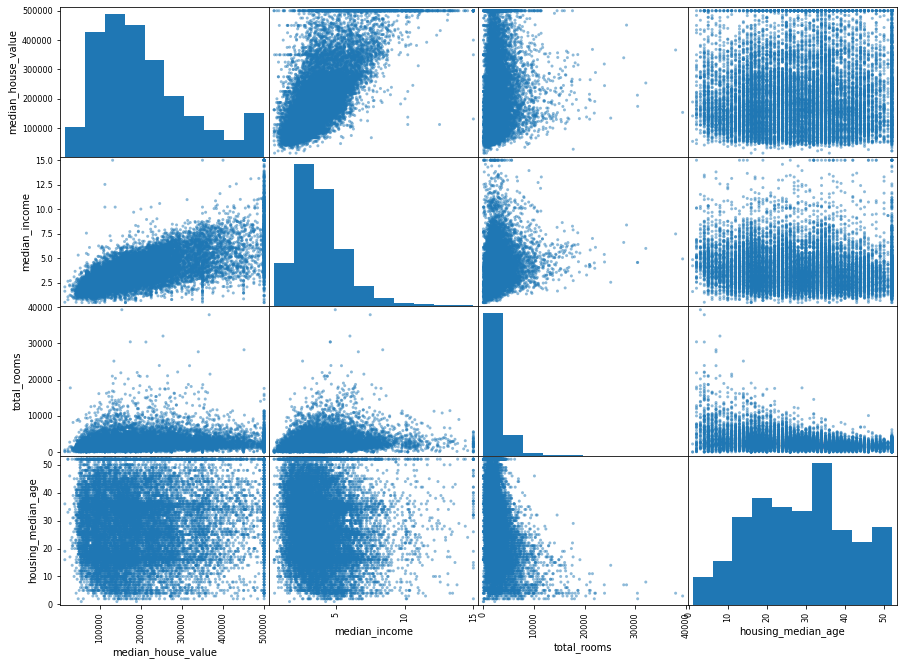

In [22]:
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(15,11))
plt.savefig("data/images/scatter_matrix_plot.png")

### The correlation between median_income and median_house_value is the strongest. The correlation matrix shows that the correlation coefficient is 0.688075. The second graph in the first row in the above scatter matrix shows the positive correlation between these two attributes and that the price caps out at 500k. 

In [23]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
ocean_proximity             0.076990
households                  0.064506
total_bedrooms              0.047813
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.249253
Name: median_house_value, dtype: float64

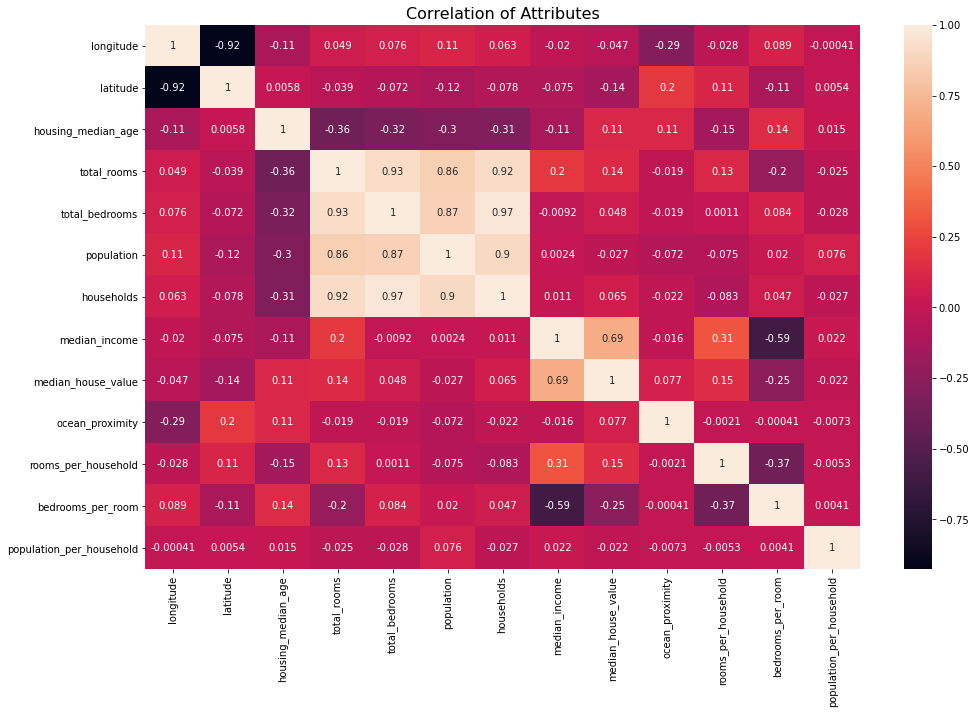

In [24]:
plt.figure(figsize = (16,10))
sns.heatmap(housing.corr(), annot=True)
plt.title("Correlation of Attributes", size=16)
plt.savefig("data/images/heatmap.png")

In [25]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076198,0.108030,0.063070,-0.019583,-0.047432,-0.285428,-0.028345,0.088851,-0.000410
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072011,-0.115222,-0.077647,-0.075205,-0.142724,0.196195,0.107621,-0.107987,0.005420
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.323624,-0.298710,-0.306428,-0.111360,0.114110,0.113492,-0.147186,0.137612,0.015031
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.925173,0.855109,0.918392,0.200087,0.135097,-0.018953,0.127519,-0.195643,-0.024810
total_bedrooms,0.076198,-0.072011,-0.323624,0.925173,1.000000,0.870316,0.972981,-0.009233,0.047813,-0.019310,0.001127,0.083856,-0.028283
population,0.108030,-0.115222,-0.298710,0.855109,0.870316,1.000000,0.904637,0.002380,-0.026920,-0.072221,-0.074692,0.019783,0.076225
households,0.063070,-0.077647,-0.306428,0.918392,0.972981,0.904637,1.000000,0.010781,0.064506,-0.022056,-0.083009,0.046716,-0.027416
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009233,0.002380,0.010781,1.000000,0.687160,-0.016234,0.311563,-0.586988,0.021822
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047813,-0.026920,0.064506,0.687160,1.000000,0.076990,0.146285,-0.249253,-0.021985
ocean_proximity,-0.285428,0.196195,0.113492,-0.018953,-0.019310,-0.072221,-0.022056,-0.016234,0.076990,1.000000,-0.002061,-0.000408,-0.007254


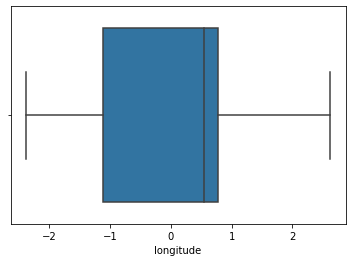

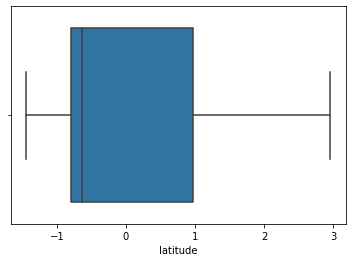

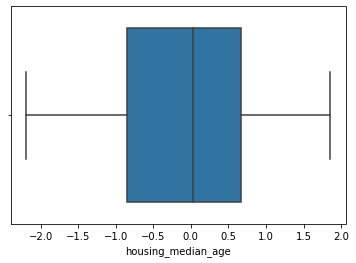

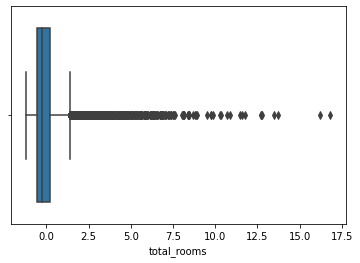

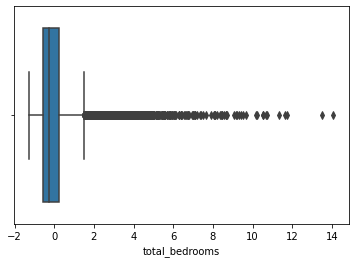

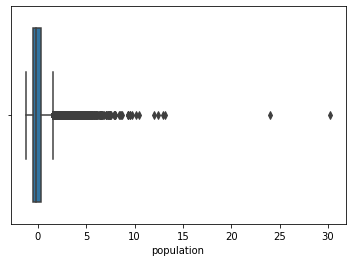

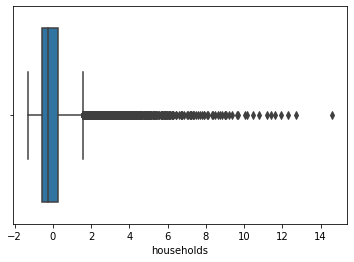

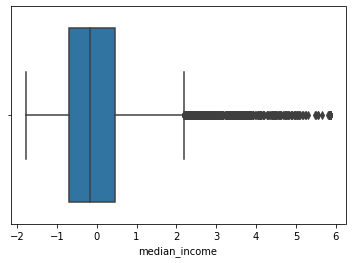

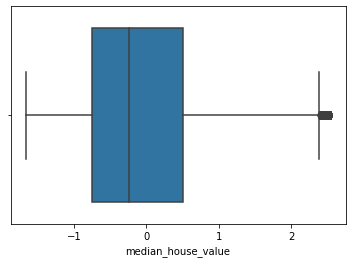

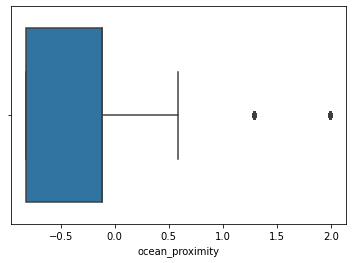

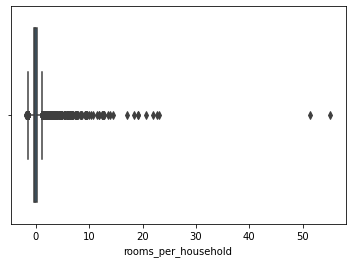

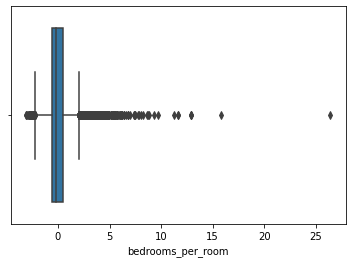

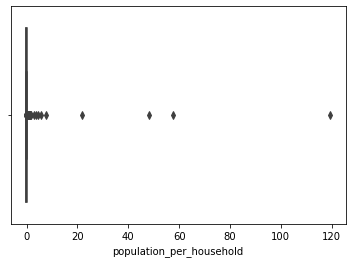

In [26]:
# Checking for Outliers
for column in scaled_df:
    plt.figure()
    sns.boxplot(x=scaled_df[column])

In [27]:
# Calculation of IQR:
Q1=housing.quantile(0.25)
Q3=housing.quantile(0.75)
IQR=Q3-Q1
print(IQR)

longitude                        3.790000
latitude                         3.780000
housing_median_age              19.000000
total_rooms                   1698.000000
total_bedrooms                 350.000000
population                     935.250000
households                     323.000000
median_income                    2.177700
median_house_value          144100.000000
ocean_proximity                  1.000000
rooms_per_household              1.614321
bedrooms_per_room                0.064932
population_per_household         0.850133
dtype: float64


In [28]:
# IQR for 'median_income' and other features detecting outliers with IQR, TRUE=outliers, FALSE=valid data
print(housing<(Q1-1.5*IQR))
(housing>(Q3+1.5*IQR))

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606      False     False               False        False           False   
18632      False     False               False        False           False   
14650      False     False               False        False           False   
3230       False     False               False        False           False   
3555       False     False               False        False           False   
...          ...       ...                 ...          ...             ...   
6563       False     False               False        False           False   
12053      False     False               False        False           False   
13908      False     False               False        False           False   
11159      False     False               False        False           False   
15775      False     False               False        False           False   

       population  households  median_income  media

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17606,False,False,False,False,False,False,False,False,False,False,False,False,False
18632,False,False,False,False,False,False,False,False,False,False,False,False,False
14650,False,False,False,False,False,False,False,False,False,True,False,False,False
3230,False,False,False,False,False,False,False,False,False,False,False,False,False
3555,False,False,False,True,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6563,False,False,False,False,False,False,False,False,False,False,False,False,False
12053,False,False,False,False,False,False,False,False,False,False,False,False,False
13908,False,False,False,False,False,False,False,False,False,False,False,False,False
11159,False,False,False,False,False,False,False,False,False,False,False,False,False


In [29]:
# Removing Outliers:
data_OLR = housing[~((housing < (Q1 - 1.5 * IQR)) |(housing > (Q3 + 1.5 * IQR))).any(axis=1)]
data_OLR.shape

(9861, 13)

# Data Preparation

In [30]:
# Data Preparation
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)

housing_num = housing.drop("ocean_proximity", axis=1)

from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

In [31]:
X_Features=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity']
X=scaled_df[X_Features]
Y=scaled_df['median_house_value']

print(type(X))
print(type(Y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [32]:
print(housing.shape)
print(X.shape)
print(Y.shape)

(16512, 12)
(20640, 9)
(20640,)


In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(16512, 9) (16512,)
(4128, 9) (4128,)


# Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

data = housing.iloc[:5]
labels = housing_labels.iloc[:5]
data_preparation = full_pipeline.transform(data)
print("Predictions: ", lin_reg.predict(data_preparation))

Predictions:  [210236.44586878 316332.27889335 211069.452793    57850.82317317
 187106.21724643]


In [35]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
y_predict = lin_reg.predict(x_test)

print(sqrt(mean_squared_error(y_test,y_predict)))
print((r2_score(y_test,y_predict)))

0.6055289178542321
0.6277832896594451


# Decision Tree Regression

In [36]:
dtreg= DecisionTreeRegressor(max_depth=9)
dtreg.fit(x_train, y_train)
y_predict = dtreg.predict(x_test)
print(sqrt(mean_squared_error(y_test,y_predict)))
print((r2_score(y_test,y_predict)))

0.5313521317021981
0.713390260506267


# Random Forest Regression

In [37]:
rfreg = RandomForestRegressor()
rfreg.fit(x_train, y_train)
y_predict = rfreg.predict(x_test)
print(sqrt(mean_squared_error(y_test,y_predict)))
print((r2_score(y_test,y_predict)))

0.42561323244697497
0.8161107533512736


# Lasso Regression

In [38]:
lassoreg=Lasso(alpha=0.001,normalize=True)
lassoreg.fit(x_train,y_train)
print(sqrt(mean_squared_error(y_test,lassoreg.predict(x_test))))
print('R2 Value/Coefficient of determination:{}'.format(lassoreg.score(x_test,y_test)))

0.7193140967070711
R2 Value/Coefficient of determination:0.4747534206169959


# Ridge Regression

In [39]:
ridgereg=Ridge(alpha=0.001,normalize=True)
ridgereg.fit(x_train,y_train)
print(sqrt(mean_squared_error(y_test,ridgereg.predict(x_test))))
print('R2 Value/Coefficient of determination:{}'.format(ridgereg.score(x_test,y_test)))

0.6054935456361189
R2 Value/Coefficient of determination:0.6278267747704707


# ElasticNet Regression

In [40]:
from sklearn.linear_model import ElasticNet
elasticreg=ElasticNet(alpha=0.001,normalize=True)
elasticreg.fit(x_train,y_train)
print(sqrt(mean_squared_error(y_test,elasticreg.predict(x_test))))
print('R2 Value/Coefficient of determination:{}'.format(elasticreg.score(x_test,y_test)))

0.944358169398106
R2 Value/Coefficient of determination:0.09468529806704551


# Hypothesis Testing and P Values

In [41]:
lm=smf.ols(formula='median_house_value ~ longitude+latitude+housing_median_age+total_rooms+total_bedrooms+population+households+median_income+ocean_proximity',data=scaled_df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     3994.
Date:                Mon, 01 Mar 2021   Prob (F-statistic):               0.00
Time:                        20:02:33   Log-Likelihood:                -18876.
No. Observations:               20640   AIC:                         3.777e+04
Df Residuals:                   20630   BIC:                         3.785e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -4.857e-17      0.004  -1.16e-14      1.000      -0.008       0.008
longitude             -0.7383      0.013    -57.169      0.000      -0.764      -0.713
latitude              -0.7854      0.013    -61.608      0.000      -0.810      -0.760
housing_median_age     0.1247      0.005     26.410      0.000       0.115       0.134
total_rooms           -0.1188      0.015     -8.147      0.000      -0.147      -0.090
total_bedrooms         0.2724      0.021     13.004      0.000       0.231       0.313
population            -0.3934      0.011    -37.243      0.000      -0.414      -0.373
households             0.2812      0.022     12.890      0.000       0.238       0.324
median_income          0.6528      0.005    119.364      0.000       0.642       0.664
ocean_proximity        0.0010      0.005      0.212      0.832      -0.008       0.010
==============================================================================
Omnibus:                     5058.808   Durbin-Watson:                   0.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19017.751
Skew:                           1.189   Prob(JB):                         0.00
Kurtosis:                       7.057   Cond. No.                         13.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
scaled_df.to_csv(r"data\linreg.csv", index = False)